Detección y filtrado de valores atípicos (outliers)
Filtrar o transformar los valores atípicos es en gran medida una cuestión de aplicar operaciones de arrays.

Un valor atípico (outlier, en inglés) es una observación que numéricamente es muy distinta al resto de elementos de una muestra. Estos datos nos pueden causar problemas en la interpretación de lo que ocurre en un proceso o en una población.

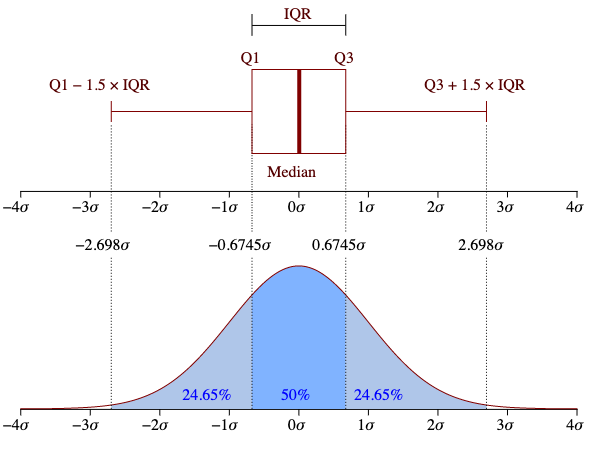

Ejemplo para filtrar valores atípicos de un dataset que no sigue una normal standard:

In [12]:
import pandas as pd
import numpy as np


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#DataFrame con los valores proporcionados

data_values = [
    [-5.10, 0.25, 4.3, 7.9],
    [5.6, 3.9, 0.08, 3.8],
    [-4.3, 1.16, 0.055, -1.3],
    [6.1, -0.23, -0.88, -3.1],
    [-1.01, 0, 1, 7.12],
    [-4.6, -5.29, -0.52, 0.7],
    [-3.26, -1.06, 0.18, 6.6],
    [2.17, 0.13, -4.81, -1.09]
]
data = pd.DataFrame(data_values, columns=["A","B","C","D"])
data

,A,B,C,D
0,-5.10,0.25,4.300,7.90
1,5.60,3.90,0.080,3.80
2,-4.30,1.16,0.055,-1.30
3,6.10,-0.23,-0.880,-3.10
4,-1.01,0.00,1.000,7.12
5,-4.60,-5.29,-0.520,0.70
6,-3.26,-1.06,0.180,6.60
7,2.17,0.13,-4.810,-1.09


In [7]:
data.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,-0.550000,-0.142500,-0.074375,2.578750
std,4.600724,2.553237,2.497670,4.324067
min,-5.100000,-5.290000,-4.810000,-3.100000
25%,-4.375000,-0.437500,-0.610000,-1.142500
50%,-2.135000,0.065000,0.067500,2.250000
75%,3.027500,0.477500,0.385000,6.730000
max,6.100000,3.900000,4.300000,7.900000


Supongamos que nos piden filtrar el dataframe de forma tal que solo muestre aquellas filas que contienen los outliers. Para este caso los outliers son aquellos valores mayores a 3 y menores a -3

In [9]:
outlier_mask = (data.abs() > 6 )
outlier_mask
# Todos los True son los outliers que cumplen la condición impuesta

,A,B,C,D
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,True
5,False,False,False,False
6,False,False,False,True
7,False,False,False,False


Si quiero que muestre los datos en vez de los Booleanos

In [10]:
data[(data.abs() > 6).any(axis="columns")]
data
# Es mas dificil diferenciar los outliers

,A,B,C,D
0,-5.10,0.25,4.300,7.90
1,5.60,3.90,0.080,3.80
2,-4.30,1.16,0.055,-1.30
3,6.10,-0.23,-0.880,-3.10
4,-1.01,0.00,1.000,7.12
5,-4.60,-5.29,-0.520,0.70
6,-3.26,-1.06,0.180,6.60
7,2.17,0.13,-4.810,-1.09


Vamos a crear otro dataframe aplicando el método np.sign() a todos los valores del dataframe original. Lo que se quiere es Mantener los outliers y reemplazar los demás valores con 1, -1 o 0

In [13]:
result = data.where(outlier_mask, np.sign(data))
result

,A,B,C,D
0,-1.0,1.0,1.0,7.90
1,1.0,1.0,1.0,1.00
2,-1.0,1.0,1.0,-1.00
3,6.1,-1.0,-1.0,-1.00
4,-1.0,0.0,1.0,7.12
5,-1.0,-1.0,-1.0,1.00
6,-1.0,-1.0,1.0,6.60
7,1.0,1.0,-1.0,-1.00


Finalmente filtramos solo aquellas filas que contienen los outliers:

In [14]:
rows_with_outliers = data[outlier_mask.any(axis=1)]
rows_with_outliers

,A,B,C,D
0,-5.10,0.25,4.30,7.90
3,6.10,-0.23,-0.88,-3.10
4,-1.01,0.00,1.00,7.12
6,-3.26,-1.06,0.18,6.60


Visualizaciones

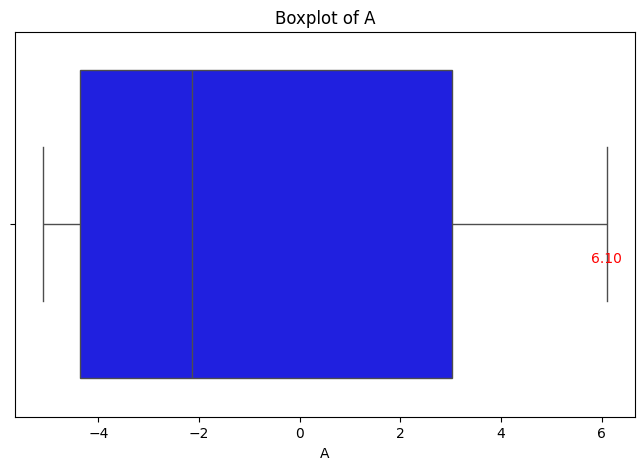

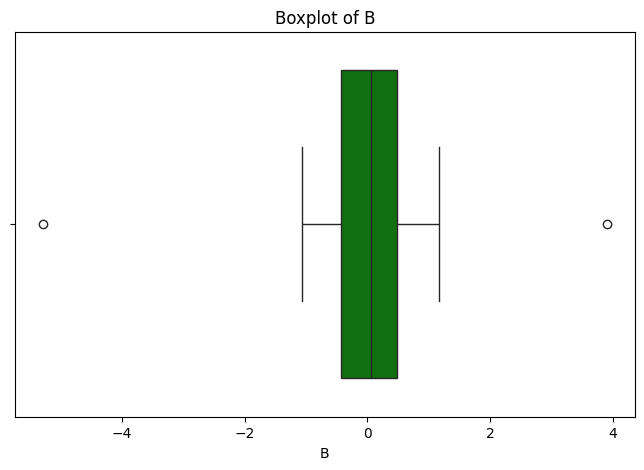

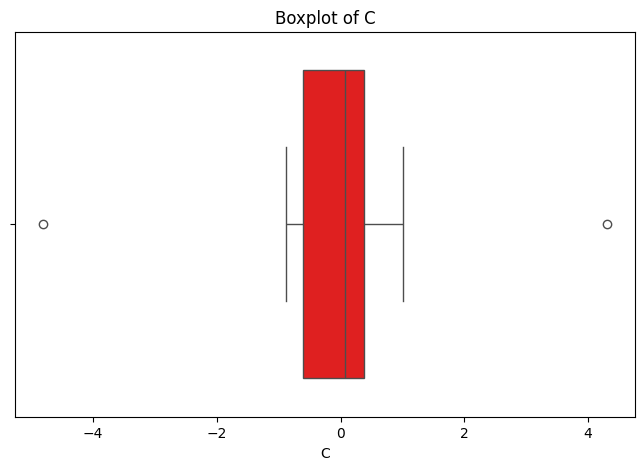

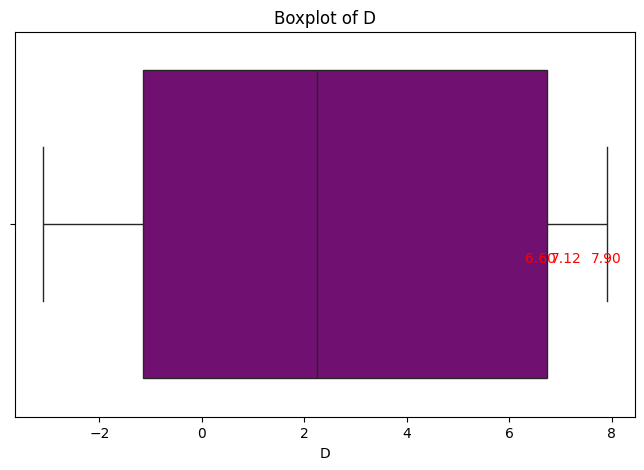

In [29]:
colors = ['blue', 'green', 'red', 'purple']
for column, color in zip(data.columns, colors):
    plt.figure(figsize=(8, 5))
    boxplot = sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()

Ejercicio_1: 
Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 1.25 y menores a -1.25. Los plots son opcionales.

In [30]:
data_1 = pd.DataFrame(np.random.standard_normal((1000, 4)), columns = ['A', 'B', 'C', 'D'])
data_1.head()

,A,B,C,D
0,-1.778659,-0.972379,0.370155,0.869354
1,0.494709,0.564125,0.527006,-0.584308
2,1.501598,-0.529816,-0.963473,-0.755693
3,-0.679370,0.043243,-0.659409,0.221718
4,1.107612,0.467409,-1.174937,-0.462760


In [32]:
outlier_mask = (data_1.abs() > 1.25) | (data_1.abs() < -1.25)
outlier_mask
# Todos los True son los outliers que cumplen la condición impuesta

,A,B,C,D
0,True,False,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,True,False,False
998,True,False,True,False


In [35]:
result = data_1.where(outlier_mask, np.sign(data_1))
result

,A,B,C,D
0,-1.778659,-1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,-1.000000
2,1.501598,-1.000000,-1.000000,-1.000000
3,-1.000000,1.000000,-1.000000,1.000000
4,1.000000,1.000000,-1.000000,-1.000000
...,...,...,...,...
995,1.000000,1.000000,-1.000000,1.000000
996,1.000000,-1.000000,1.000000,1.000000
997,-1.000000,-1.299987,-1.000000,-1.000000
998,1.991297,1.000000,-1.964083,1.000000


In [36]:
rows_with_outlies = data_1[outlier_mask.any(axis=1)]
rows_with_outlies  

,A,B,C,D
0,-1.778659,-0.972379,0.370155,0.869354
2,1.501598,-0.529816,-0.963473,-0.755693
6,-0.183685,1.739806,2.161970,-0.096490
13,0.427900,1.649902,0.008256,0.224900
17,-0.243293,1.565985,0.554479,-0.070103
...,...,...,...,...
993,0.555602,-1.063888,0.714475,1.980720
994,-0.631922,-1.693895,2.043485,1.549904
997,-1.143890,-1.299987,-1.204299,-0.431048
998,1.991297,1.021829,-1.964083,0.058566


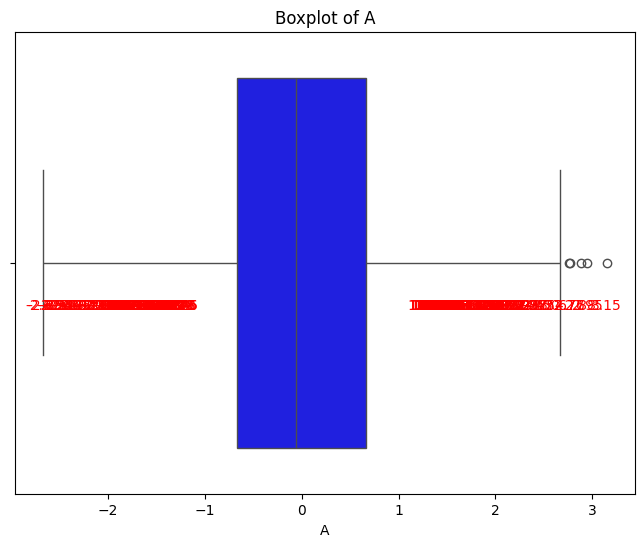

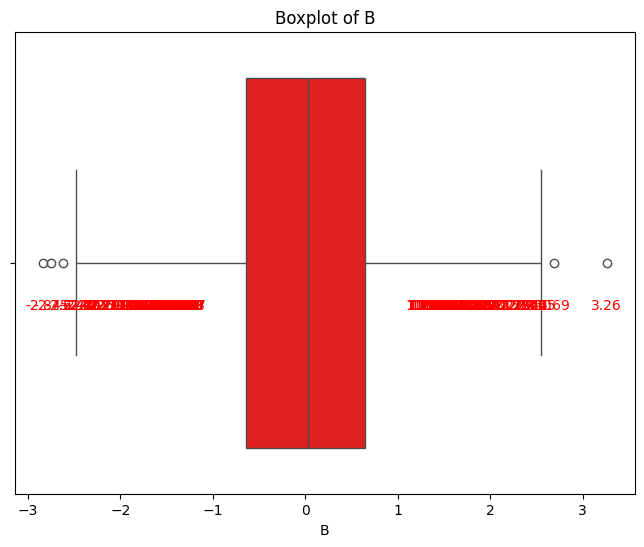

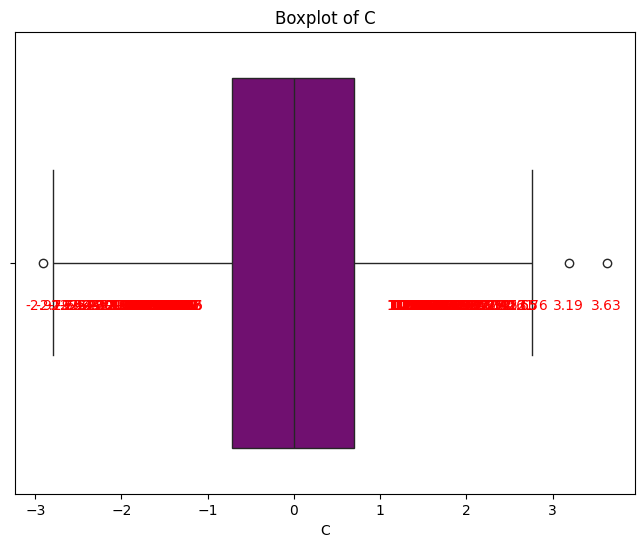

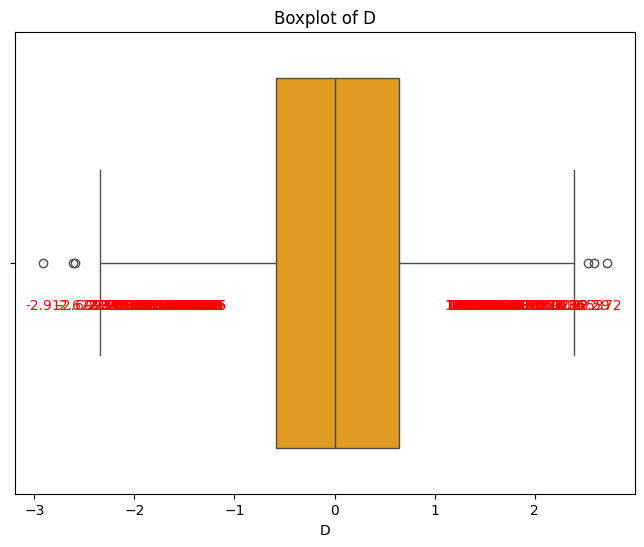

In [38]:
colors = ['blue', 'red', 'purple', 'orange']
for column, color in zip(data_1.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data_1[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data_1[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()

Ejercicio 2. Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 4 y menores a cero. Los plots son opcionales.


In [40]:
data_2 = pd.DataFrame(np.random.uniform(-5, 5, size=(1000, 5)), columns=['A','B','C','D','E'])
data_2.head()

,A,B,C,D,E
0,4.996182,-2.620609,-2.914206,2.754499,-2.469599
1,3.022117,3.193099,1.195107,-2.465536,4.080386
2,-1.978868,-2.361723,-3.221470,2.263917,-0.210423
3,1.582988,-4.064866,4.529939,-2.057723,3.471289
4,-4.208742,-2.728289,-3.932752,3.288341,-4.160630


data_2 =

In [41]:
outlier_mask2 = (data_2.abs() > 4)|(data_2.abs() < 0)
outlier_mask2

,A,B,C,D,E
0,True,False,False,False,False
1,False,False,False,False,True
2,False,False,False,False,False
3,False,True,True,False,False
4,True,False,False,False,True
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,True,False,False,False,False


In [42]:
result2 = data_2.where(outlier_mask2, np.sign(data_2))
result2
                       

,A,B,C,D,E
0,4.996182,-1.000000,-1.000000,1.0,-1.000000
1,1.000000,1.000000,1.000000,-1.0,4.080386
2,-1.000000,-1.000000,-1.000000,1.0,-1.000000
3,1.000000,-4.064866,4.529939,-1.0,1.000000
4,-4.208742,-1.000000,-1.000000,1.0,-4.160630
...,...,...,...,...,...
995,1.000000,-1.000000,1.000000,-1.0,-1.000000
996,1.000000,-1.000000,-1.000000,-1.0,1.000000
997,-1.000000,-1.000000,1.000000,-1.0,1.000000
998,4.106498,-1.000000,-1.000000,-1.0,1.000000


In [47]:
rows_with_outliers2 =data_2[outlier_mask2.any(axis=1)]
rows_with_outliers2

,A,B,C,D,E
0,4.996182,-2.620609,-2.914206,2.754499,-2.469599
1,3.022117,3.193099,1.195107,-2.465536,4.080386
3,1.582988,-4.064866,4.529939,-2.057723,3.471289
4,-4.208742,-2.728289,-3.932752,3.288341,-4.160630
6,-0.764546,4.250847,4.230972,-1.261850,2.200303
...,...,...,...,...,...
990,1.774606,-3.891614,-0.718707,4.012750,1.746058
992,-2.110489,-2.022072,3.420422,4.968528,0.747381
993,-1.719435,4.581116,-0.216268,3.054530,-3.249558
998,4.106498,-3.179423,-1.893205,-0.353912,1.880228


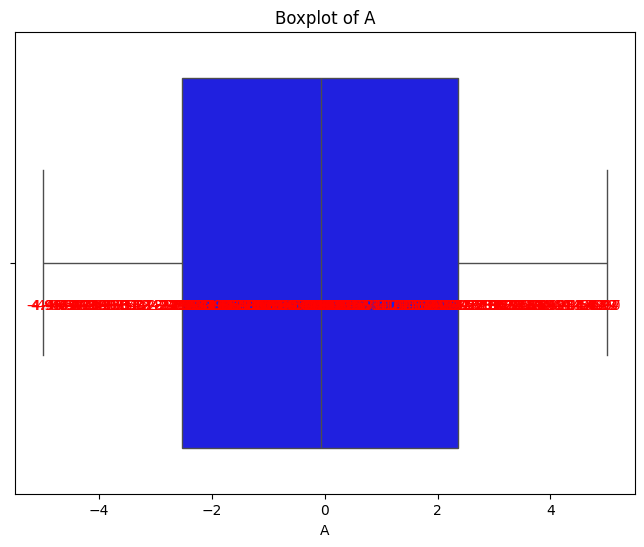

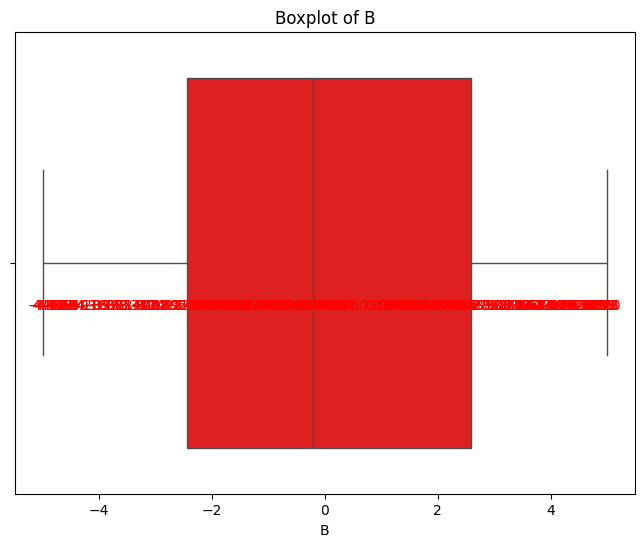

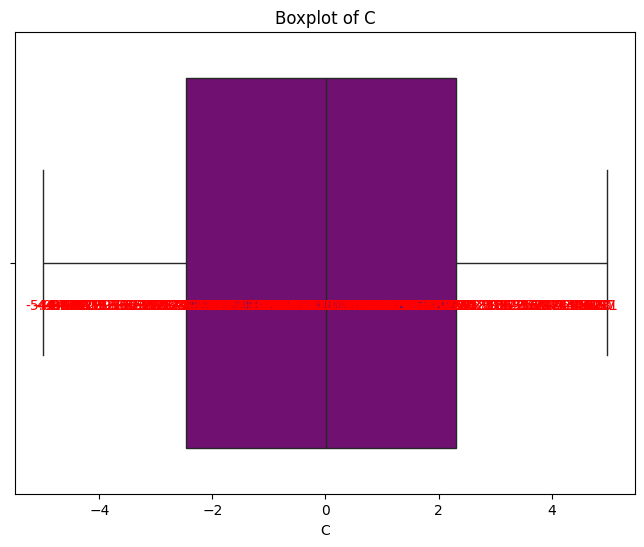

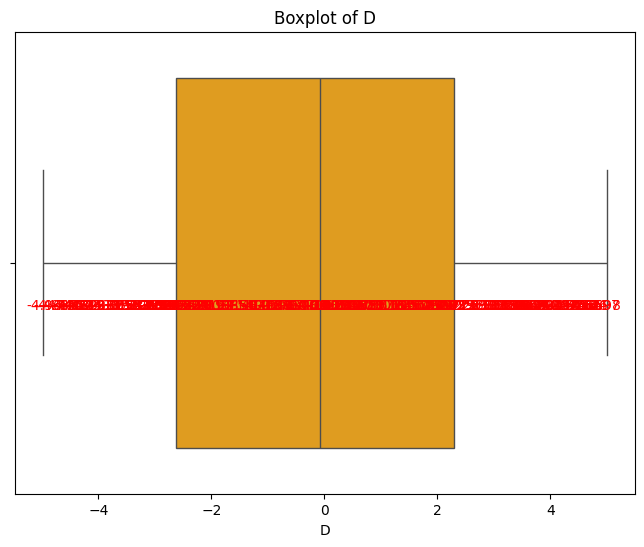

In [48]:
colors = ['blue', 'red', 'purple', 'orange']
for column, color in zip(data_2.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data_2[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data_2[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()